## **Convolutional Neural Network (CNN)**


# Extract the .zip file 

In [ ]:
from zipfile import ZipFile
file_name = 'Data.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


# Load Libraries

First step is to load the required libraries.

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Dense , Conv2D, Flatten, MaxPooling2D

from keras.utils import np_utils

# Load Dataset from Images

In the root directory, there is a `Data' folder containing separate folders train and test. train and test contains training data and testing data respectively. Inside these, we have multiple folders each corresponding to a particular class. And each of them contains images of that class. In the given dataset, we have $10$ folders each in train and test corresponding to the $10$ classes $(0,1,...,9)$. So our task is to extract the data from images into numpy arrays.

In [ ]:
import os

import cv2

# load data from the path specified by the user

def data_loader(path_train, path_test):
  train_list=os.listdir(path_train)
  
  # Number of classes in the dataset
  num_classes=len(train_list)
  
  # Empty lists for loading training and testing data images as well as corresponding labels
  x_train=[]
  y_train=[]
  x_test=[]
  y_test=[]
  
  # Loading training data
  for label,elem in enumerate(train_list):
    path1=path_train+'/'+str(elem)
    images=os.listdir(path1)
    for elem2 in images:
      path2=path1+'/'+str(elem2)
      
      # Read the image form the directory
      img = cv2.imread(path2)
      
      # Append image to the train data list
      x_train.append(img)
      
      # Append class-label corresponding to the image
      y_train.append(label)
    
    # Loading testing data
    path1=path_test+'/'+str(elem)
    images=os.listdir(path1)
    for elem2 in images:
      path2=path1+'/'+str(elem2)
      
      # Read the image form the directory
      img = cv2.imread(path2)
      
      # Append image to the test data list
      x_test.append(img)
      
      # Append class-label corresponding to the image
      y_test.append(label)
  
  # Convert lists into numpy arrays
  x_train=np.asarray(x_train)
  y_train=np.asarray(y_train)
  x_test=np.asarray(x_test)
  y_test=np.asarray(y_test)
  return x_train,y_train,x_test,y_test

# path specified by the user
path_train = 'Data/train'
path_test = 'Data/test'
X_train,y_train,X_test,y_test = data_loader(path_train, path_test)

print("Loading Done")

Loading Done


In [ ]:
X_train.shape


(60000, 28, 28, 3)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28, 3)

In [ ]:
y_test.shape

(10000,)

# Formatting Data and Labels for Deep Learning

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

# forcing the precision of the pixel values to be 32 bit
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.

# one hot encode outputs using np_utils.to_categorical inbuilt function
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

# Splitting Data into Training, and Validation

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting the trining data into training and validation

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


# Defining a Shallow CNN Model

Here we define a small CNN network. It contains a convolutional layer having 32 filters each of size (3 × 3).
Then we flatten the feature map and add 2 dense layers. First one having 100 neurons and last one having
10 neurons i.e. equal to number of classes.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides = (1,1), padding = 'same' , input_shape=input_shape, activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


# Compiling the model

Once the model is defined, we have to compile it. While compiling we provide the loss function to be used, the optimizer and any metric. Here we will use crossentropy loss with Adam optimizer and accuracy as a metric.

In [ ]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training/Fitting the model

Now the model is ready to be trained. We will provide training data to the network. Also we will specify the validation data, over which the model will only be validated.

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 42s 870us/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.0698 - val_acc: 0.9842
Epoch 2/2
48000/48000 [==============================] - 42s 867us/step - loss: 0.0012 - acc: 0.9998 - val_loss: 0.0829 - val_acc: 0.9825


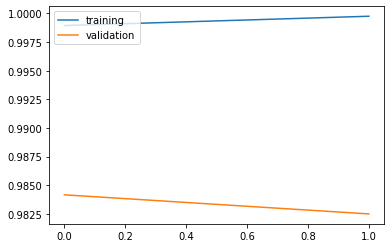

In [ ]:
# Training model

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()


# Evaluating the model

Finally we will evaluate the model on the testing dataset.

In [ ]:
# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

10000/10000 [==============================] - 3s 333us/step
Baseline Error: 1.87%



# Defining a Deep Model

Now we will define a multi layer neural network in which we will add $2$ hidden layers having $500$ and $100$ neurons.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding = 'same' , input_shape = input_shape, activation = 'relu'))
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding = 'valid'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding = 'same', activation = 'relu'))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Analyzing Model Summary

The following function provides us with detailed summary of the model. We can use it after we have defined
our model.

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)              

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 231s 5ms/step - loss: 0.1958 - acc: 0.9402 - val_loss: 0.0568 - val_acc: 0.9834
Epoch 2/2
48000/48000 [==============================] - 228s 5ms/step - loss: 0.0428 - acc: 0.9873 - val_loss: 0.0485 - val_acc: 0.9853


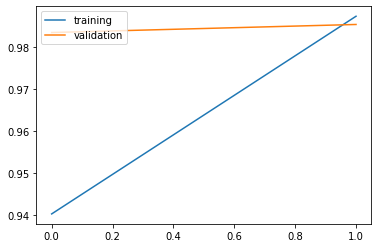

10000/10000 [==============================] - 13s 1ms/step
Baseline Error: 1.27%


In [ ]:
import h5py

# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2, batch_size=200)

model.save_weights('CNN.h5')

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

# Loading the saved model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding = 'same' , input_shape = input_shape, activation = 'relu'))
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding = 'valid'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding = 'same', activation = 'relu'))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
model.load_weights('CNN.h5')

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

# Creating checkpoints of model

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath='CNN.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2, batch_size=200, callbacks=callbacks_list)

# Defining Learning Rate Decay and Other Parameters of Optimizer

In [ ]:
from keras.optimizers import SGD, Adam

sgd = SGD(lr = 0.001, momentum = 0.0005, decay = 0.0005)

#adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0005)

#model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1, batch_size=200)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
 2200/48000 [>.............................] - ETA: 3:36 - loss: 2.2740 - acc: 0.2932